# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Vieving the Dataset

In [2]:
df_male = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/Datasets/ANSUR II MALE Public.csv",encoding='latin-1') 

df_female = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/Datasets/ANSUR II FEMALE Public.csv",encoding='latin-1')

df = pd.concat([df_male, df_female])

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
dropped = ['subjectid', 
           'SubjectNumericRace', 
           'Ethnicity', 'Heightin', 
           'Weightlbs', 'Date', 
           'Installation', 'Component', 
           'Branch', 'PrimaryMOS', 
           'SubjectId']

In [5]:
df.drop(dropped , axis = 1 ,inplace = True)

In [6]:
df.shape

(6068, 98)

## Dedecting Missing Values

In [7]:
df.isna().sum().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
weightkg,6068.0,797.093935,156.528164,358.0,682.0,785.0,896.00,1442.0
wristcircumference,6068.0,169.002966,13.124513,124.0,159.0,170.0,179.00,216.0
wristheight,6068.0,830.059987,47.650519,672.0,797.0,830.0,863.00,1009.0
DODRace,6068.0,1.615030,0.979156,1.0,1.0,1.0,2.00,8.0


## Outlier Dedection

In [9]:
df.shape

(6068, 98)

In [10]:
def outlier_deleter(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      df.drop(outlier_indexes , axis = 0 , inplace = True)
      print(f'Total outlier {len(outlier_indexes)} in {col} column and dropped.')

In [11]:
outlier_deleter(df,'DODRace',3)

Total outlier 1 in abdominalextensiondepthsitting column and dropped.
Total outlier 0 in acromialheight column and dropped.
Total outlier 0 in acromionradialelength column and dropped.
Total outlier 0 in anklecircumference column and dropped.
Total outlier 0 in axillaheight column and dropped.
Total outlier 0 in balloffootcircumference column and dropped.
Total outlier 0 in balloffootlength column and dropped.
Total outlier 0 in biacromialbreadth column and dropped.
Total outlier 0 in bicepscircumferenceflexed column and dropped.
Total outlier 0 in bicristalbreadth column and dropped.
Total outlier 0 in bideltoidbreadth column and dropped.
Total outlier 0 in bimalleolarbreadth column and dropped.
Total outlier 0 in bitragionchinarc column and dropped.
Total outlier 0 in bitragionsubmandibulararc column and dropped.
Total outlier 0 in bizygomaticbreadth column and dropped.
Total outlier 0 in buttockcircumference column and dropped.
Total outlier 0 in buttockdepth column and dropped.
Tot

In [12]:
df.shape

(6062, 98)

In [13]:
df.reset_index(drop=True, inplace=True)

## Looking the Target Variable

In [14]:
df['DODRace'].value_counts()

1    3789
2    1295
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [15]:
df.drop(df[df['DODRace'] > 3].index, axis = 0, inplace=True) # We should drop some classes because there is less than 500 data. Model could'nt predict well them.

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df.corr()['DODRace'].drop('DODRace').sort_values()

sittingheight           -0.324328
eyeheightsitting        -0.319637
wristheight             -0.268097
stature                 -0.232939
elbowrestheight         -0.227414
                           ...   
bizygomaticbreadth       0.032468
thighcircumference       0.032510
bitragionchinarc         0.083229
heelbreadth              0.167020
interpupillarybreadth    0.194209
Name: DODRace, Length: 94, dtype: float64

In [18]:
abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(10)

sittingheight             0.324328
eyeheightsitting          0.319637
wristheight               0.268097
stature                   0.232939
elbowrestheight           0.227414
lateralmalleolusheight    0.218593
acromialheight            0.217652
cervicaleheight           0.215988
waistbacklength           0.208058
axillaheight              0.205867
Name: DODRace, dtype: float64

In [19]:
# df.drop(abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(3).index , axis = 1 , inplace = True)

In [20]:
df.shape

(5763, 98)

In [21]:
df['DODRace'].value_counts()

1    3789
2    1295
3     679
Name: DODRace, dtype: int64

## Creating X and y features

In [22]:
# X = df.drop('DODRace',axis=1)
X_ohe = pd.get_dummies(df.drop('DODRace',axis=1),drop_first=True) # This might be better.
y = df['DODRace']

## Handling Imbalanced Data

In [23]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_ohe, y_smote = oversample.fit_resample(X_ohe, y)

# This is doing oversampling.

In [24]:
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

# It does both increment and decrement

In [25]:
# from imblearn.combine import SMOTEENN

# smt = SMOTEENN(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

# LogisticRegression

## Train | Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_smote, test_size=0.2, random_state=53)

## Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearch For Best Model

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [29]:
# log_vanilla = LogisticRegression(max_iter=10000, class_weight='balanced' , solver = 'liblinear' , random_state = 53)


# param_grid = {'penalty' : ['l1','l2'] , "C" : np.linspace(1,300,100)}


# log_grid_model = GridSearchCV(estimator=log_vanilla,
#                           param_grid=param_grid,
#                           cv=5,
#                           scoring="accuracy", 
#                           verbose = 2 , 
#                           n_jobs=-1)

In [30]:
# log_grid_model.fit(X_train_scaled , y_train)

In [31]:
# log_grid_model.best_score_

In [32]:
# log_grid_model.best_params_

In [33]:
# log_grid_model = LogisticRegression(C = log_grid_model.best_params_['C'] , max_iter=10000, class_weight='balanced' , solver = 'liblinear' , random_state = 53).fit(X_train_scaled , y_train)

In [34]:
log_grid_model = LogisticRegression(penalty = 'l1' , C = 113 , max_iter=10000, class_weight='balanced' , solver = 'liblinear' , random_state = 53).fit(X_train_scaled , y_train)

In [35]:
# log_grid_model = LogisticRegression(penalty = 'l2' , C = 200 , max_iter=10000, class_weight='balanced' , solver = 'liblinear' , random_state = 53).fit(X_train_scaled , y_train)

## Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(classification_report(y_test, y_pred), end='\n')
    print("Train Set")
    print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Set
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       777
           2       0.92      0.94      0.93       755
           3       0.89      0.86      0.88       742

    accuracy                           0.91      2274
   macro avg       0.91      0.91      0.91      2274
weighted avg       0.91      0.91      0.91      2274

Train Set
              precision    recall  f1-score   support

           1       0.92      0.94      0.93      3012
           2       0.95      0.95      0.95      3034
           3       0.92      0.89      0.90      3047

    accuracy                           0.93      9093
   macro avg       0.93      0.93      0.93      9093
weighted avg       0.93      0.93      0.93      9093



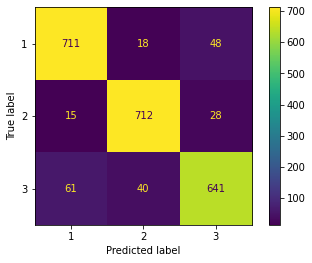

In [38]:
eval_metric(log_grid_model , X_train_scaled , y_train , X_test_scaled , y_test)

In [39]:
from sklearn.model_selection import cross_validate

log_grid_model = LogisticRegression(penalty = 'l1' , C = 113 , max_iter=10000, class_weight='balanced' , solver = 'liblinear' , random_state = 53)

cross_validate(log_grid_model , X_train_scaled , y_train , cv = 5 , scoring = 'accuracy')['test_score'].mean()

0.9128991678717074

## Visulization Multiclass Roc

In [40]:
log_grid_model.fit(X_train_scaled , y_train)

LogisticRegression(C=113, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=53, solver='liblinear')

In [41]:
from sklearn.metrics import roc_curve, auc, plot_precision_recall_curve

In [42]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

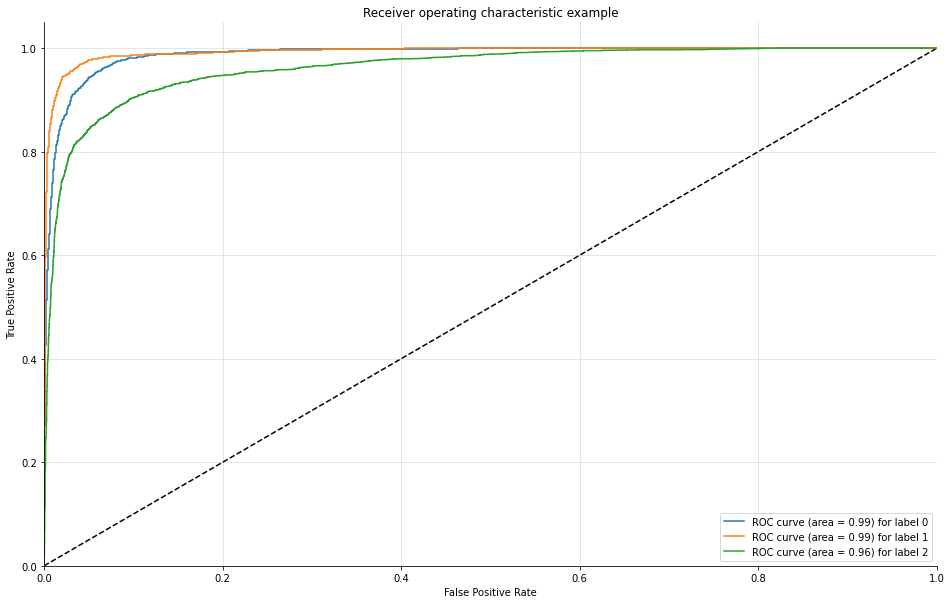

In [43]:
plot_multiclass_roc(log_grid_model, X_train_scaled, y_train, n_classes=3, figsize=(16, 10))

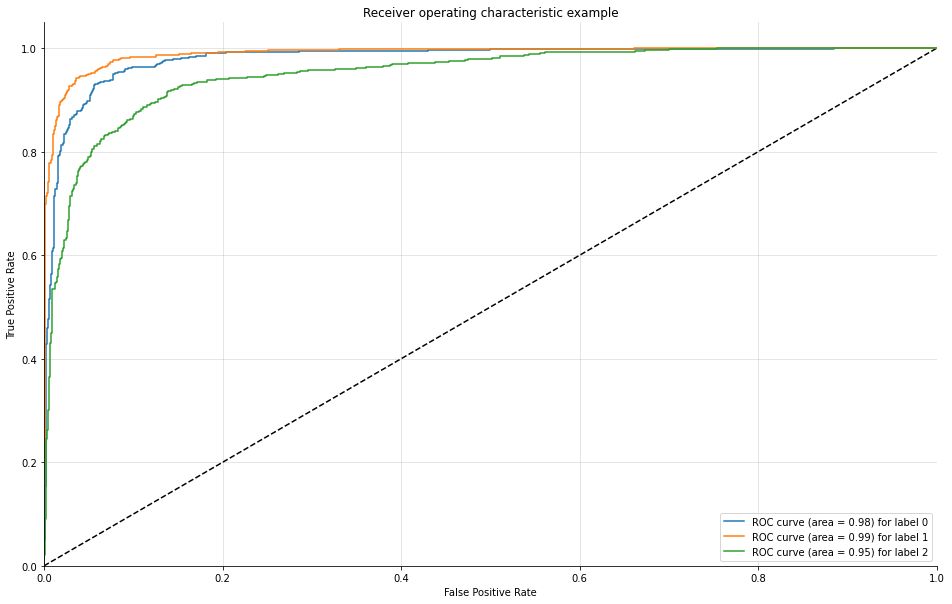

In [44]:
plot_multiclass_roc(log_grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

In [45]:
# Done